In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into  training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Show the first training example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training sample:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

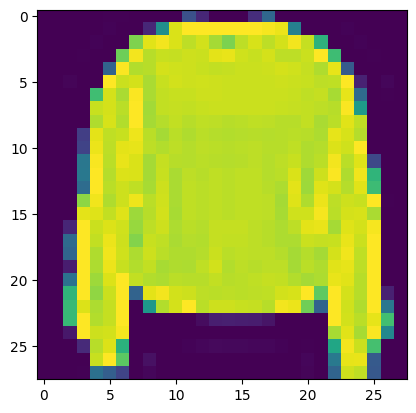

In [ ]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
#Check the samples label
train_labels[7]

np.uint8(2)

In [ ]:
#Create a small list so we can index onto our training labels so they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)


10

Text(0.5, 1.0, 'Coat')

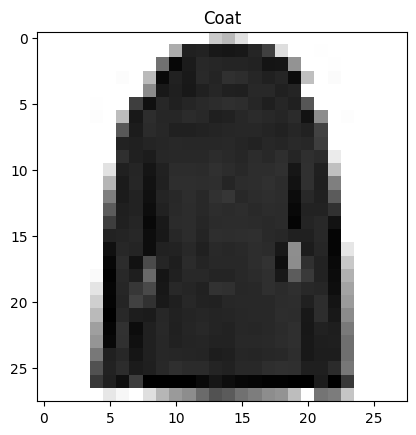

In [ ]:
#Plot an exmaple image and it's label
index = 2000
plt.imshow(train_data[index],
           cmap = plt.cm.binary)
plt.title(class_names[train_labels[index]])

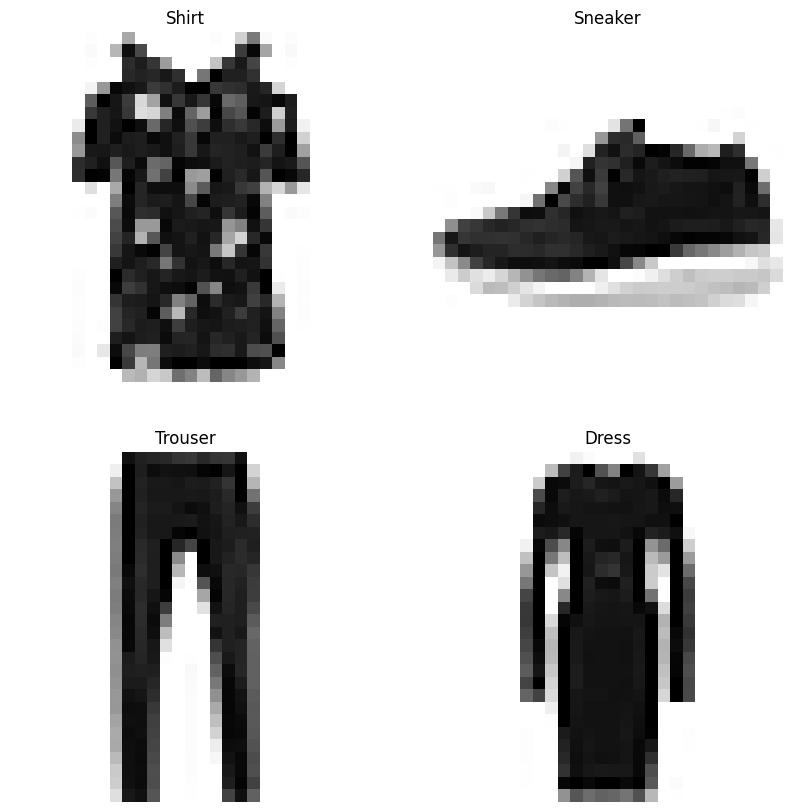

In [ ]:
#PLot multiple random images of fashion MNIST

import random
plt.figure(figsize=(10,10))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

#Building a multi-class classification model

For our multiclass classification model, we can use a siimilar architecture to our binary classifiers, however we ='re going to have to twaek a few things:

* Input shape = 28 X 28 (the shape of one image)
* Output shape = 10 (1 per class of clothing)
* Loss function = tf.keras.losses.CategorialCrossEntropy()
  * If your labels are one-hot encoded use CategorialCrossEntropy()
  * If your labels are integer form use SparseCategoricalCrossEntropy()
* Output Layer activation = Softmax (not Sigmoid)

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#Compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#Fit the model
non_norm_history = model_1.fit(train_data ,
                               tf.one_hot(train_labels, depth = 10),
                               epochs = 10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth = 10)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0993 - loss: 4.2637 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0989 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0986 - loss: 2.302

In [ ]:
#Check the model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
#Check the min and max values of the training data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

Neural networks prefer the data to be scaled (or normalized), this means they like to have numbers in the tensors they try to find patterns in between 0 and 1



In [ ]:
#We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

In [ ]:
#Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
#Now our data is normalized , let's build aa model to find patterns in it

#Set the random seed
tf.random.set_seed(42)

#Create a model (same as model_1)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#Fit the model
norm_history = model_2.fit(train_data_norm,
                               train_labels,
                               epochs = 10,
                               validation_data=(test_data_norm, test_labels)
                               )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3623 - loss: 1.6553 - val_accuracy: 0.5841 - val_loss: 0.9843
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6712 - loss: 0.8961 - val_accuracy: 0.7622 - val_loss: 0.7447
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7710 - loss: 0.6957 - val_accuracy: 0.7818 - val_loss: 0.6529
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7861 - loss: 0.6249 - val_accuracy: 0.7886 - val_loss: 0.6204
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7960 - loss: 0.5931 - val_accuracy: 0.7920 - val_loss: 0.6029
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8025 - loss: 0.5741 - val_accuracy: 0.7969 - val_loss: 0.5904
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8065 - loss: 0.5612 - val_accuracy: 0.7988 - val_loss: 0.5821
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8094 - loss: 0.5514 - 

🔑**Note:** Neural networks tend to prefer data in numerical form as well as scaled/ normalized(numbers between 0 & 1)

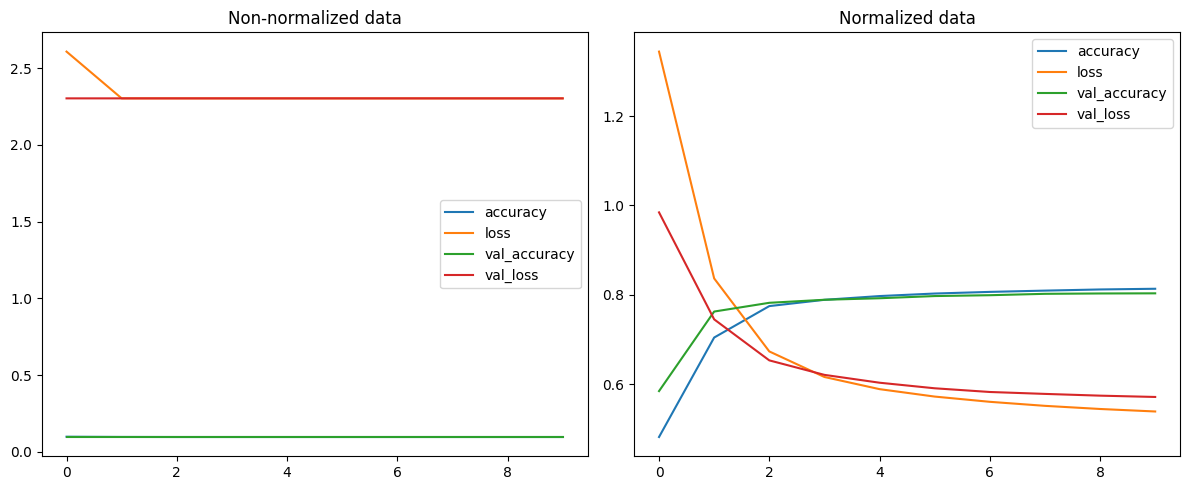

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot non-normalized data
pd.DataFrame(non_norm_history.history).plot(ax=axes[0])
axes[0].set_title("Non-normalized data")

# Plot normalized data
pd.DataFrame(norm_history.history).plot(ax=axes[1])
axes[1].set_title("Normalized data")

plt.tight_layout()
plt.show()


🔑**Note:** The same model with even a *slightly* different data can produce *dramatically*  different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria(Eg. same architecture but different data or same data but different architechture).

#Finding the ideal learning rate


In [ ]:
#Set the random seed
tf.random.set_seed(42)

#Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

#Compile the model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10 **(epoch/20))

#Fit the model
find_lr_history = model_3.fit(train_data_norm,
                               train_labels,
                               epochs = 40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks = [lr_scheduler])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3617 - loss: 1.5765 - val_accuracy: 0.7051 - val_loss: 0.7858 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7267 - loss: 0.7483 - val_accuracy: 0.7564 - val_loss: 0.6948 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7646 - loss: 0.6672 - val_accuracy: 0.7715 - val_loss: 0.6430 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7726 - loss: 0.6230 - val_accuracy: 0.7761 - val_loss: 0.6210 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7765 - loss: 0.6062 - val_accuracy: 0.7801 - val_loss: 0.6127 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7800 - loss: 0.5966 - val_accuracy: 0.7838 - val_loss: 0.6072 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7834 - 

Text(0.5, 1.0, 'Learning Rate vs Loss')

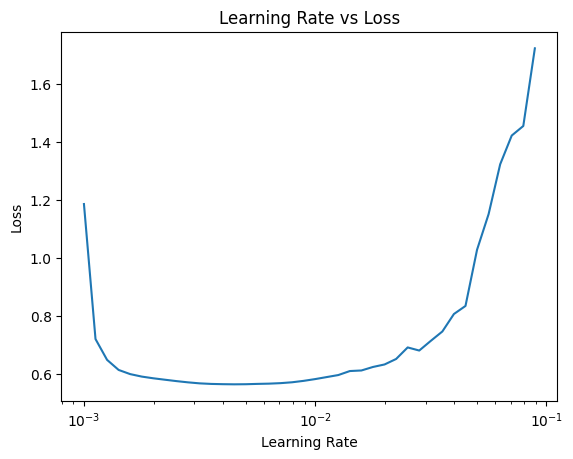

In [ ]:
#Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
#Let's refit the model with the ideal learning rate

#Set the random seed
tf.random.set_seed(42)

#Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#Compile the model
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"])


#Fit the model
history_4 = model_4.fit(train_data_norm,
                               train_labels,
                               epochs = 20,
                               validation_data=(test_data_norm, test_labels)
                               )


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4931 - loss: 1.4643 - val_accuracy: 0.6857 - val_loss: 0.8636
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7323 - loss: 0.7645 - val_accuracy: 0.7724 - val_loss: 0.6594
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7873 - loss: 0.6230 - val_accuracy: 0.7883 - val_loss: 0.6100
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8014 - loss: 0.5737 - val_accuracy: 0.7953 - val_loss: 0.5894
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8092 - loss: 0.5500 - val_accuracy: 0.8001 - val_loss: 0.5747
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8152 - loss: 0.5346 - val_accuracy: 0.8045 - val_loss: 0.5652
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8184 - loss: 0.5231 - val_accuracy: 0.8098 - val_loss: 0.5572
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8213 - loss: 0.5143 -

#Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics(such as confusion matrix)
* Access some of it's predictions(through visualizations)
* Improve it's results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [ ]:
#Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
#Make some predictions with our model
y_probs = model_4.predict(test_data)

#View the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        4.7482558e-30, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5106866e-35, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on(Eg. if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [ ]:
y_probs[0], class_names[tf.argmax(y_probs[0])]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       dtype=float32),
 'Ankle boot')

In [ ]:
#Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1)

#View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 7, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[708,  33,   5,  94,  68,   3,  81,   0,   5,   3],
       [  0, 968,   5,  21,   5,   0,   0,   0,   1,   0],
       [ 14,  94, 246,   9, 612,   0,  22,   0,   3,   0],
       [ 17, 101,   0, 721, 149,   0,   9,   1,   0,   2],
       [  0,  10,  10,  10, 944,   0,  22,   0,   4,   0],
       [  0,  16,   0,   9,   0, 195,   2, 138,  37, 603],
       [108,  33,  25,  54, 545,   0, 224,   1,   9,   1],
       [  0,  25,   0,   1,   0,   2,   0, 844,   1, 127],
       [  3,  16,   1,  54,  49,   1,   7,   3, 863,   3],
       [  1,   2,   0,   1,   0,   0,   1,  21,   0, 974]])

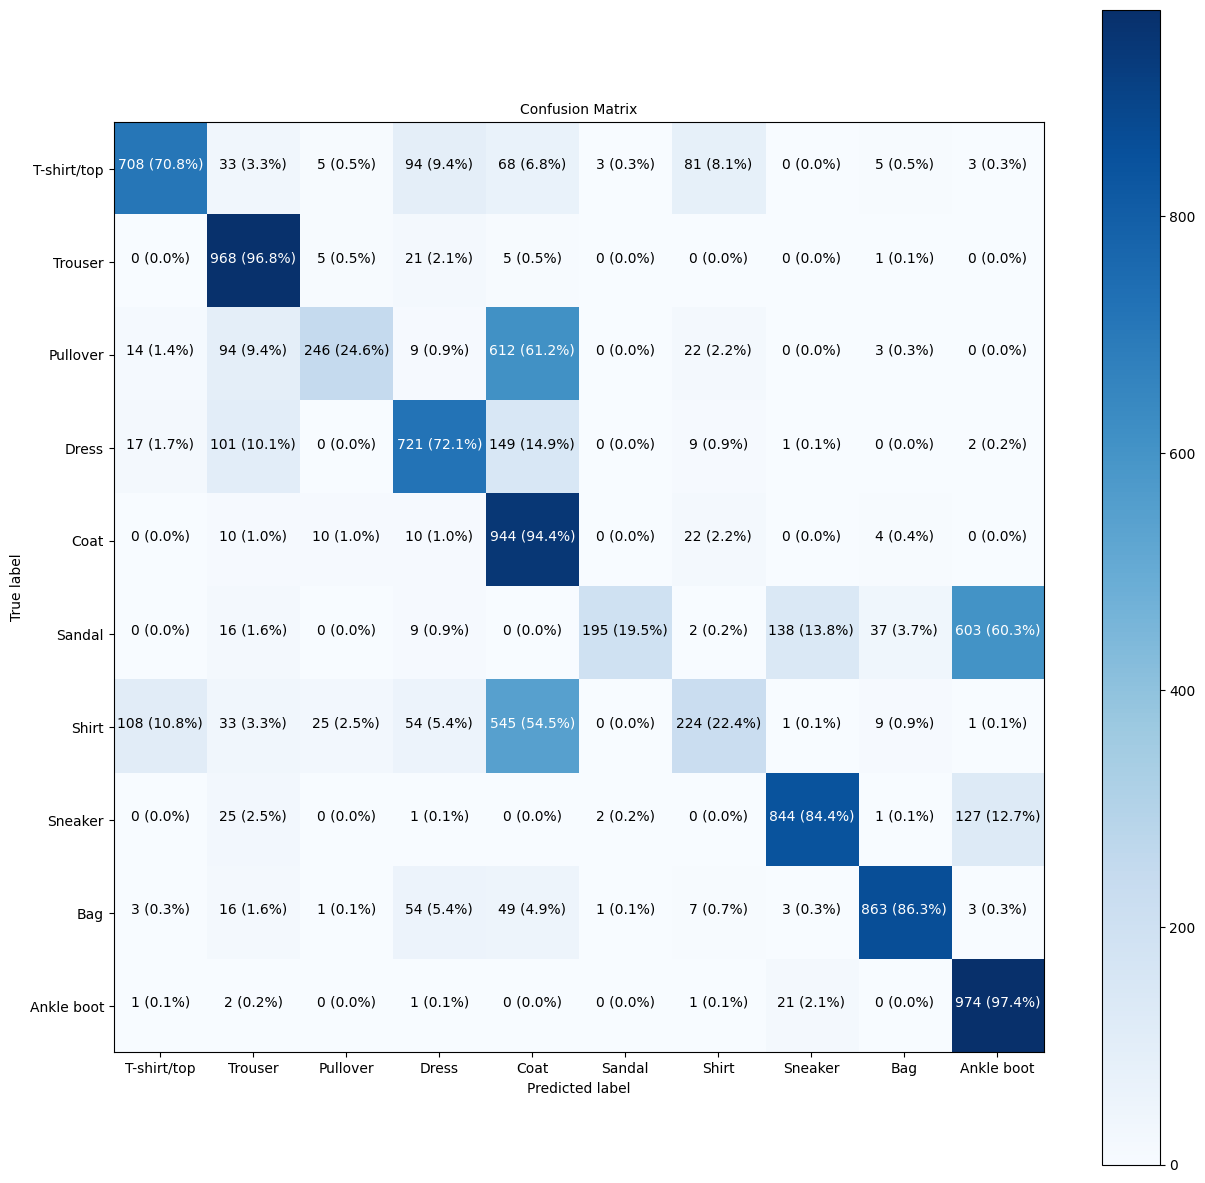

In [ ]:
#Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15,15), text_size = 10)

🔑 **Note:** Often when working together with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of the data

How about we create a fun little function for:
* Plot a random image
* Make the prediction of the said image
* Label the plot with the truth label and the predicted label

In [ ]:
import random

def plot_random_images(model, images, true_labels, classes):
  #Set up a random integer
  i = random.randint(0,len(images))

  #Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  #Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  #Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color = color)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


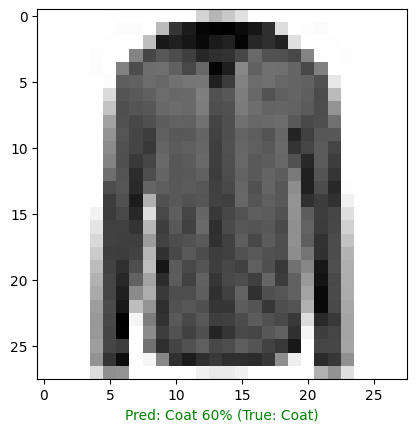

In [ ]:
#Check out a random image as well as it's prediction
plot_random_images(model = model_4,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)